# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [8]:
# prerequisite package imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/ernesteNtezirizaza/plotting-assignment/refs/heads/master/fuel_econ.csv')

data.head(8)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5


Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

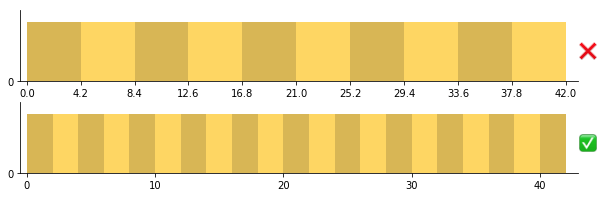

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








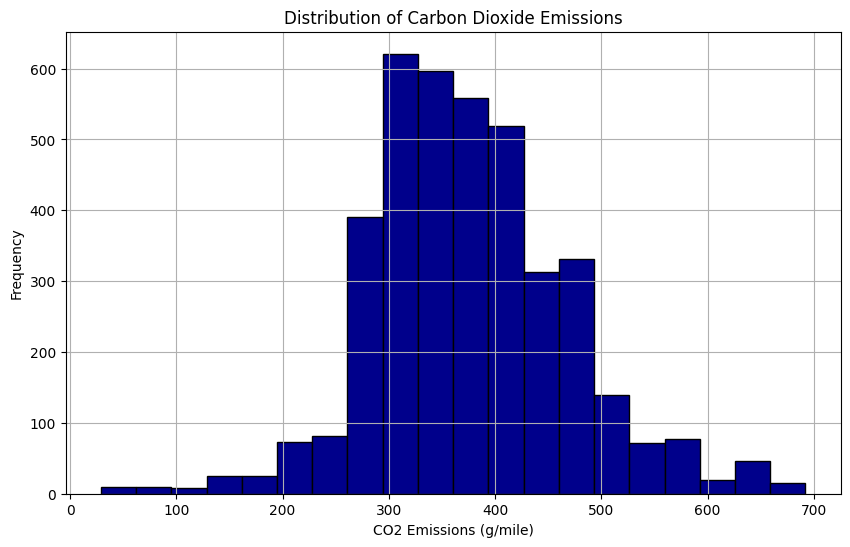

In [18]:
# Plot histogram for carbon dioxide emissions
plt.figure(figsize=(10,6))
plt.hist(data['co2'], bins=20, edgecolor='black', color='darkblue')
plt.title('Distribution of Carbon Dioxide Emissions')
plt.xlabel('CO2 Emissions (g/mile)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

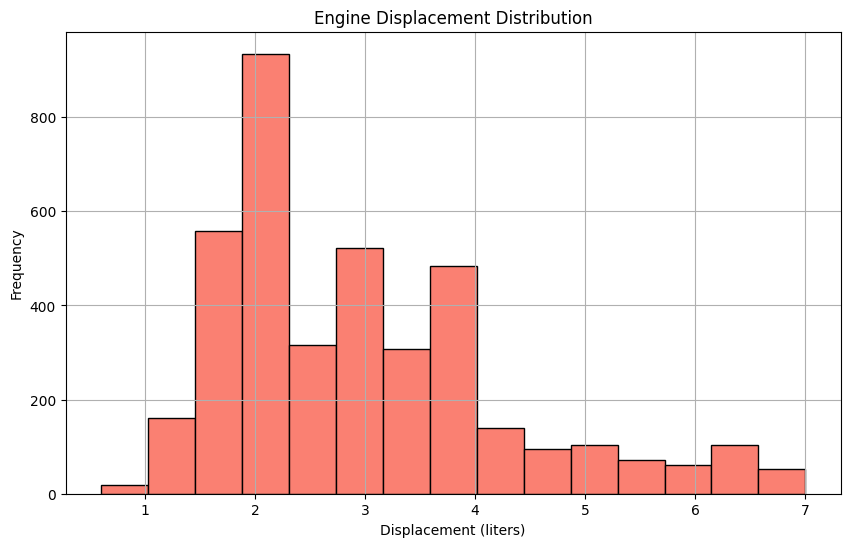

In [19]:
# Histogram of engine displacement
plt.figure(figsize=(10,6))
plt.hist(data['displ'], bins=15, color='salmon', edgecolor='black')
plt.title('Engine Displacement Distribution')
plt.xlabel('Displacement (liters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

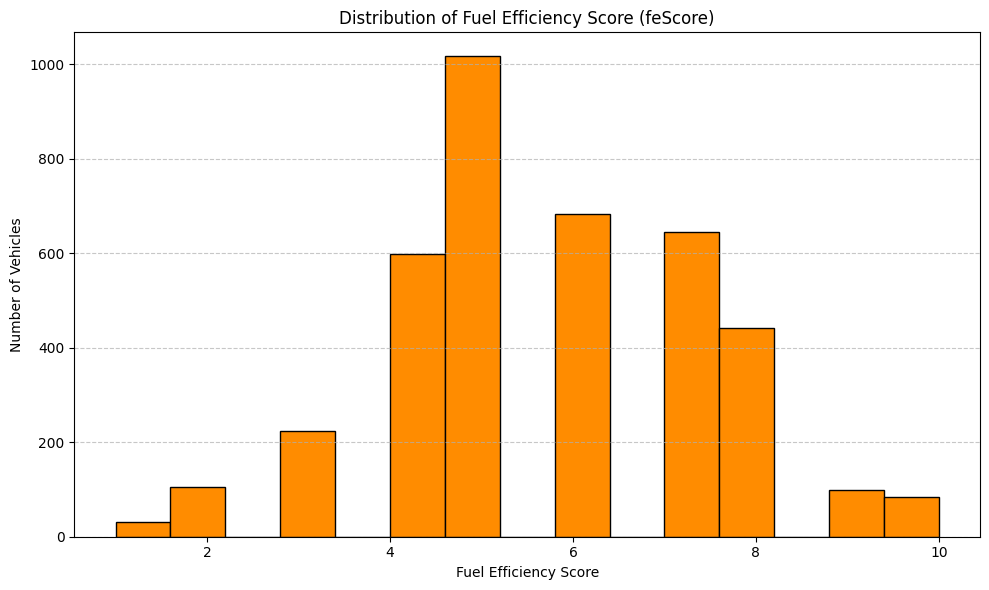

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data['feScore'].dropna(), bins=15, color='darkorange', edgecolor='black')
plt.title('Distribution of Fuel Efficiency Score (feScore)')
plt.xlabel('Fuel Efficiency Score')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

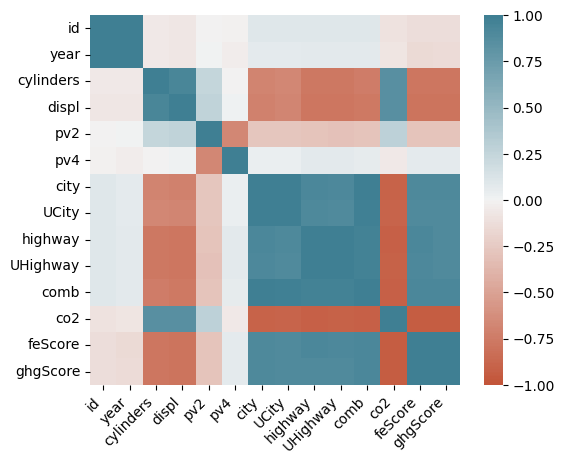

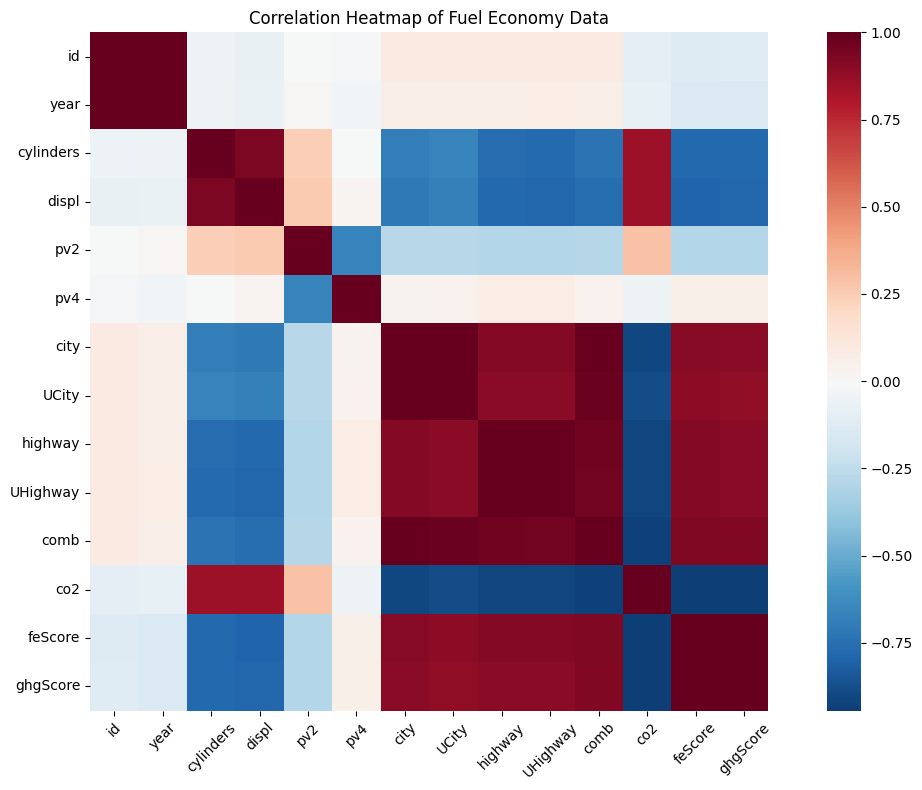

In [22]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r', center=0, square=True)
plt.title('Correlation Heatmap of Fuel Economy Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## Interpret the data - What story does the visualization tell?
#
# The heatmap reveals strong positive correlations between efficiency metrics (city, highway, comb MPG values), showing that vehicles efficient in one driving condition tend to be efficient in others.
# Engine characteristics (cylinders and displacement) have strong positive correlations with CO2 emissions and strong negative correlations with fuel economy metrics.
# Environmental metrics (feScore and ghgScore) have extremely high positive correlation with each other and negative correlation with CO2 emissions.
# feScore is also strongly positively correlated with all MPG values and ghgScore, indicating that better fuel economy leads to a higher environmental score.
# Variables such as ‘id’, ‘pv2’, and ‘pv4’ show negligible correlation with other variables, suggesting they may not contribute meaningfully to the target prediction.
#

In [ ]:
## What Columns would you delete if the target is the ghgScore? Justify your Answer
#
# If the goal is to predict `ghgScore`, we should drop:
# - `id`: It is a unique identifier and carries no predictive value.
# - `pv2`, `pv4`: These variables show very weak or no correlation with the target or other meaningful features.
# - `year`: It has a weak correlation with `ghgScore` and likely does not contribute significantly.
# Additionally, be cautious of multicollinearity:
# - `feScore` is highly correlated with `ghgScore`. If we include it, it may dominate the model and hide effects of other variables. Either keep it with regularization or drop it if building an interpretable model.
#